# Introduction

This notebook is a part of my IBM Machine Learning Professional Certificate. 

In this notebook I will perform deep learning for objects recognition as part of my IBM Machine Learning Professional Certificate: Deep Learning and Reinforcement Learning. 

_"One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to use deep learning for a task of your choosing. It can be any Deep Learning application for supervised or unsupervised learning. You choose to work on a classification, image, or text application on a data set that you feel passionate about. Then, you will tweak your deep learning model to best suits your needs, and communicate insights you found from your model development exercise."_

# About Dataset

In this project I will work with **CIFAR-10 dataset**

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. <br><br> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br><br> The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

**Here are the classes in the dataset, as well as 10 random images from each:**

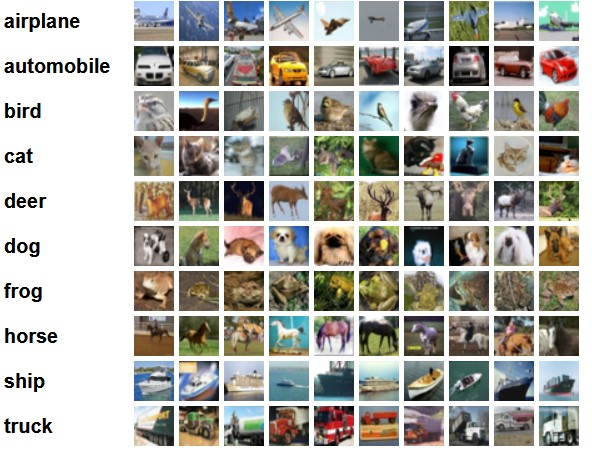

**Goal of this project:** build and train Convolutional Neural Network

# Import needed packages and Load the Dataset


In [75]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.constraints import maxnorm
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

1. First load CIFAR-10 dataset

As I struggled with issue when I was trying to load_data() I needed first run below code to successfully load CIFAR-10 dataset. More details about this issue and solving ways could be find at [GitHub](https://github.com/tensorflow/tensorflow/issues/33285)

In [3]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


2. Plot some image from dataset to visualize the dataset

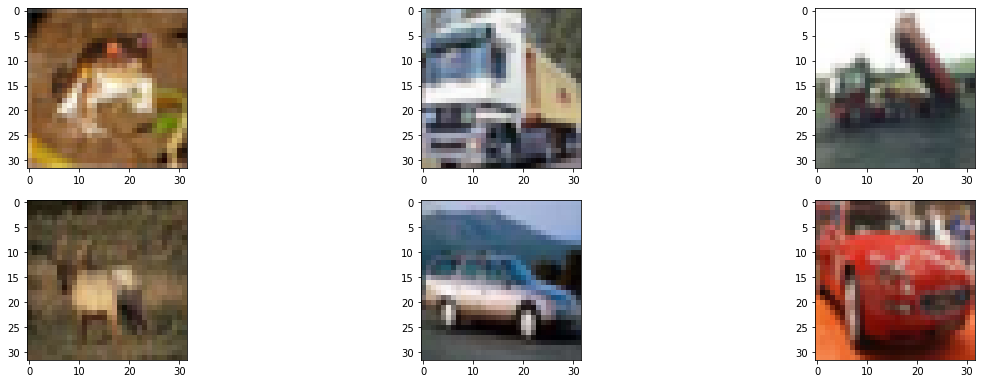

In [5]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

3. Convert the pixel values of the dataset to float type and then normalize the dataset

In [6]:
# change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
# normalize dataset
x_train /= 255
x_test /= 255

4. Perform the one-hot encoding for target classes

In [12]:
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [16]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[333]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

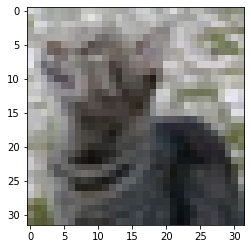

In [17]:
# let's look at one of the images

plt.imshow(x_train[333]);

# CNN Model 1

Below I will build our first CNN.

Model structure:

**Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification**

In [20]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [24]:
batch_size = 32

# initiate RMSprop optimizer
opt = optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

C:\Users\pauli\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.7393 - accuracy: 0.3631 - val_loss: 1.4738 - val_accuracy: 0.4672
Epoch 2/15
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4486 - accuracy: 0.4779 - val_loss: 1.3879 - val_accuracy: 0.5026
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3430 - accuracy: 0.5202 - val_loss: 1.2421 - val_accuracy: 0.5651
Epoch 4/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2806 - accuracy: 0.5446 - val_loss: 1.1553 - val_accuracy: 0.5930
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2302 - accuracy: 0.5653 - val_loss: 1.2465 - val_accuracy: 0.5695
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2034 - accuracy: 0.5729 - val_loss: 1.1668 - val_accuracy: 0.5876
Epoch 7/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1806 - accuracy: 0.5842 - val_loss: 1.1892 -

In [26]:
# calculate model_1 accuracy on testing data
_,acc=model_1.evaluate(x_test, y_test)
print(acc*100)

313/313 [==============================] - 2s 8ms/step - loss: 1.0841 - accuracy: 0.6305
63.05000185966492


# CNN Model 2

Model 2 structure will be a little bit more complicated:<br><br> **Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification**

In [27]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [28]:
batch_size = 32

# initiate RMSprop optimizer
opt2 = optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt2,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 213s 135ms/step - loss: 1.5684 - accuracy: 0.4321 - val_loss: 1.2038 - val_accuracy: 0.5754
Epoch 2/15
1563/1563 [==============================] - 167s 107ms/step - loss: 1.1683 - accuracy: 0.5885 - val_loss: 1.1780 - val_accuracy: 0.5845
Epoch 3/15
1563/1563 [==============================] - 158s 101ms/step - loss: 1.0142 - accuracy: 0.6461 - val_loss: 0.9293 - val_accuracy: 0.6710
Epoch 4/15
1563/1563 [==============================] - 192s 123ms/step - loss: 0.9208 - accuracy: 0.6797 - val_loss: 0.8147 - val_accuracy: 0.7160
Epoch 5/15
1563/1563 [==============================] - 179s 114ms/step - loss: 0.8621 - accuracy: 0.7016 - val_loss: 0.8844 - val_accuracy: 0.7022
Epoch 6/15
1563/1563 [==============================] - 165s 106ms/step - loss: 0.8304 - accuracy: 0.7168 - val_loss: 0.8550 - val_accuracy: 0.7101
Epoch 7/15
1563/1563 [==============================] - 164s 105ms/step - loss: 0.8118 - accuracy: 0.7207 - val_

In [29]:
# calculate model_2 accuracy on testing data
_,acc = model_2.evaluate(x_test, y_test)
print(acc*100)

313/313 [==============================] - 7s 22ms/step - loss: 0.8600 - accuracy: 0.7191
71.90999984741211


### Save Model 2

In [ ]:
model_2.save('model2_cifar10.h5')

# CNN Model 3

In [74]:
# build third model 

model_3 = Sequential()

model_3.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))

model_3.add(Dropout(0.2))
model_3.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Flatten())
model_3.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [79]:
batch_size = 32

#initiate stochastic gradient descent optimizer with a learning rate and momentum
sgd=SGD(lr=0.01, momentum=0.9, decay=(0.01/25), nesterov=False)
 
# let's train the model_3 with SGD    
model_3.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

model_3.fit(x_train, y_train,
           batch_size=batch_size,
           epochs = 15,
           validation_data=(x_test, y_test), 
           shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9078 - accuracy: 0.6780 - val_loss: 0.9782 - val_accuracy: 0.6584
Epoch 2/15
1563/1563 [==============================] - 165s 106ms/step - loss: 0.7132 - accuracy: 0.7487 - val_loss: 0.9135 - val_accuracy: 0.6937
Epoch 3/15
1563/1563 [==============================] - 164s 105ms/step - loss: 0.5759 - accuracy: 0.7978 - val_loss: 0.9043 - val_accuracy: 0.6988
Epoch 4/15
1563/1563 [==============================] - 184s 118ms/step - loss: 0.4798 - accuracy: 0.8301 - val_loss: 0.9151 - val_accuracy: 0.7055
Epoch 5/15
1563/1563 [==============================] - 176s 112ms/step - loss: 0.4044 - accuracy: 0.8582 - val_loss: 0.9199 - val_accuracy: 0.7135
Epoch 6/15
1563/1563 [==============================] - 175s 112ms/step - loss: 0.3536 - accuracy: 0.8766 - val_loss: 0.9646 - val_accuracy: 0.7099
Epoch 7/15
1563/1563 [==============================] - 173s 111ms/step - loss: 0.3100 - accuracy: 0.8900 - val_l

In [80]:
# calculate model_3 accuracy on testing data
_,acc=model_3.evaluate(x_test, y_test)
print(acc*100)

313/313 [==============================] - 5s 17ms/step - loss: 1.1369 - accuracy: 0.7204
72.03999757766724


### Save Model 3

In [81]:
model_3.save('model3_cifar10.h5')

# Summary

The objective of the image classification project using deep learning algorithm was to enable to start working with Keras to solve real-time deep learning problems and build CNN model.